In [1]:
from PIL import Image #, ImageEnhance
from tqdm import tqdm
import random
import os 
import matplotlib.pyplot as plt
import numpy as np

labels = ['CarRacing', 'Fighting', 'BikeRacing', 'Soccer']

# for i in range(180):
#     directory = f'train_{i}'
#     parent_dir = "dataset"
#     path = os.path.join(parent_dir, directory) 
#     os.mkdir(path) 
#     for label in labels:
#         path = os.path.join(f'dataset/train_{i}', label) 
#         os.mkdir(path) 

In [2]:
n_it = 10000
random.seed(128)

def rep(index, size):
    perm = []
    for i in range(size):
        rnd = random.randint(1, n_it)
        while rnd in perm:
            rnd = random.randint(1, n_it)
        perm.append(rnd)
        image = Image.open(f'raw_dataset_renamed/{labels[index]}/{labels[index]} ({perm[i]}).jpg')
        image = image.resize((128, 72))
        if i < 9000:
            image.save(f'dataset/train/{labels[index]}/{labels[index]}_{i:0>4}.jpg')
            # image.save(f'dataset/train_{i // 50}/{labels[index]}/{labels[index]}_{i:0>4}.jpg')
        else:
            image.save(f'dataset/validation/{labels[index]}/{labels[index]}_{i:0>4}.jpg')
        pbar.update(1)
        
with tqdm(total=40000) as pbar:
    rep(0, 10000)
    rep(1, 10000)
    rep(2, 10000)
    rep(3, 10000)

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [04:14<00:00, 157.36it/s]


In [2]:
from PIL import Image #, ImageEnhance
from tqdm import tqdm
import random

labels = ['CarRacing', 'Fighting', 'BikeRacing', 'Soccer']

n_it = 10000
random.seed(128)

def rep(index, size):
    perm = []
    for i in range(size):
        rnd = random.randint(1, n_it)
        while rnd in perm:
            rnd = random.randint(1, n_it)
        perm.append(rnd)
        image = Image.open(f'raw_dataset_renamed/{labels[index]}/{labels[index]} ({perm[i]}).jpg')
        image = image.resize((128, 72))
        image.save(f'dataset/pretrain/{labels[index]}/{labels[index]}_{i:0>4}.jpg')
        pbar.update(1)
        
with tqdm(total=16200) as pbar:
    rep(0, 8000)
    rep(1, 8000)
    rep(2, 100)
    rep(3, 100)

100%|███████████████████████████████████████████████████████████████████████████| 16200/16200 [01:41<00:00, 159.17it/s]


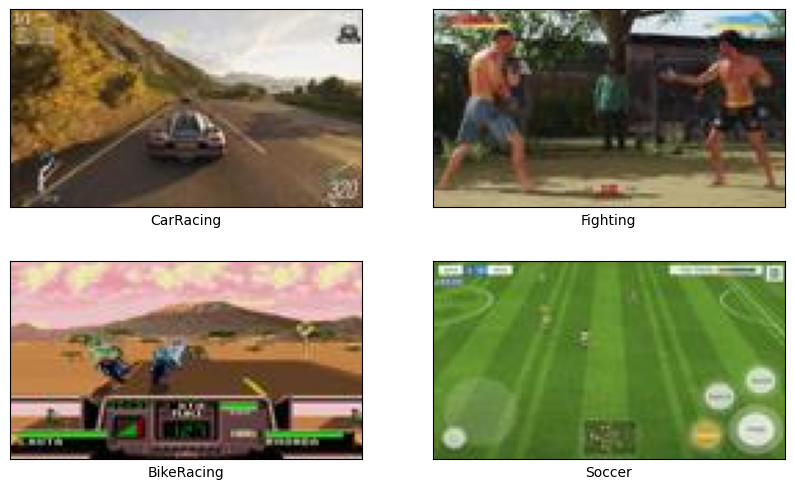

In [25]:
plt.figure(figsize=(10, 6))
number = 6

for i in range(4):
    image = Image.open(f'dataset/train/{labels[i]}/{labels[i]}_{number:0>4}.jpg')
    # image = image.numpy().reshape((28,28))
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.asarray(image))
    plt.xlabel(labels[i])
plt.show()